In [1]:
import sys


sys.path.append("/Users/aaron/phd/impact-of-contamination-on-taxonomy")

In [19]:
import pandas as pd
from workflow.fasttree_marker_split.f_a_compare_patristic_distance import FastTreeMarkerSplitComparePatristicDistance
from workflow.fasttree_marker_split_true_case.c_calculate_patristic_distance import \
    FastTreeMarkerSplitTrueCaseCalculatePatristicDistance
from workflow.util.taxonomy import calculate_taxonomic_novelty
from workflow.external.gtdb_metadata import GtdbMetadataR207
from workflow.gunc_helper.aggregate_max_css_level_merged import AggregateMaxCssLevelMerged
from workflow.fasttree_marker_split.e_decorate_fasttree import FastTreeMarkerSplitDecorateFastTree
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
DF_META = GtdbMetadataR207().output().maybe_read_cached()
DF_META.head()

,ambiguous_bases,checkm_completeness,checkm_contamination,checkm_marker_count,checkm_marker_lineage,checkm_marker_set_count,checkm_strain_heterogeneity,coding_bases,coding_density,contig_count,...,gtdb_type_species_of_genus,ncbi_taxonomy,ncbi_taxonomy_unfiltered,domain,phylum,class,order,family,genus,species
gid,,,,,,,,,,,,,,,,,,,,,
GCA_000006155.2,1916,93.12,0.0,1171,g__Bacillus (UID902),324,0.0,4305660,80.178992,426,...,f,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,d__Bacteria;x__Terrabacteria group;p__Firmicut...,d__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae_G,g__Bacillus_A,s__Bacillus_A anthracis
GCA_000007325.1,1,99.95,0.0,149,k__Bacteria (UID2329),89,0.0,1973459,90.754610,1,...,t,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria,p__Fusobacteriota,c__Fusobacteriia,o__Fusobacteriales,f__Fusobacteriaceae,g__Fusobacterium,s__Fusobacterium nucleatum
GCA_000007385.1,0,99.82,0.0,481,c__Gammaproteobacteria (UID4202),276,0.0,4190634,84.805944,1,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Xanthomonadales,f__Xanthomonadaceae,g__Xanthomonas,s__Xanthomonas oryzae
GCA_000008085.1,0,73.13,0.0,149,k__Archaea (UID2),107,0.0,462902,94.299480,1,...,t,d__Archaea;p__Nanoarchaeota;c__;o__Nanoarchaea...,d__Archaea;x__DPANN group;p__Nanoarchaeota;o__...,d__Archaea,p__Nanoarchaeota,c__Nanoarchaeia,o__Nanoarchaeales,f__Nanoarchaeaceae,g__Nanoarchaeum,s__Nanoarchaeum equitans
GCA_000008885.1,0,100.00,0.0,134,k__Bacteria (UID2495),80,0.0,617456,87.831079,2,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales_A,f__Enterobacteriaceae_A,g__Wigglesworthia,s__Wigglesworthia glossinidia_A


In [4]:
D_GID_TO_TAX = DF_META['gtdb_taxonomy'].to_dict()

In [5]:
DF_CSS = AggregateMaxCssLevelMerged().output().maybe_read_cached()
DF_CSS.head()

,n_genes_called,n_genes_mapped,n_contigs,taxonomic_level,proportion_genes_retained_in_major_clades,genes_retained_index,clade_separation_score,contamination_portion,n_effective_surplus_clades,mean_hit_identity,reference_representation_score,pass.GUNC,source
gid,,,,,,,,,,,,,
GCA_000143435.1,2189,2110,4,genus,0.89,0.86,0.55,0.03,0.06,0.95,0.82,False,gtdb
GCA_000153745.1,2202,2165,2,family,0.92,0.90,0.49,0.06,0.12,0.67,0.61,False,progenomes
GCA_000155005.1,6879,6313,84,genus,0.87,0.79,0.79,0.10,0.22,0.97,0.77,False,gtdb
GCA_000161815.1,4499,4335,8,genus,0.80,0.77,0.50,0.19,0.50,0.95,0.74,False,progenomes
GCA_000166735.2,3414,3247,793,genus,0.94,0.90,0.57,0.02,0.05,0.93,0.83,False,progenomes


In [6]:
TREE_MARKER_SPLIT = FastTreeMarkerSplitDecorateFastTree().output().read()

In [7]:
GIDS_IN_TREE = {x.label.replace('TEST_', '').replace('_C', '') for x in TREE_MARKER_SPLIT.taxon_namespace}
print(list(GIDS_IN_TREE)[0:10])
print(len(GIDS_IN_TREE))

['GCA_004558715.1', 'GCF_000420065.1', 'GCF_001007205.1', 'GCA_007130445.1', 'GCF_005392085.1', 'GCA_016790005.1', 'GCF_018916875.1', 'GCF_009696605.1', 'GCF_000693055.1', 'GCA_002441205.1']
92612


In [8]:
DF_PD = FastTreeMarkerSplitComparePatristicDistance().output().maybe_read_cached()
DF_PD.head()

,gid,ks_ref_vs_keep,ks_ref_vs_chim,ks_keep_vs_chim,pd_between_halves
0,GCF_900607965.1,0.001294,1.605714e-05,1.752719e-06,1.399059e-06
1,GCF_017776145.1,0.000008,3.751914e-06,9.942356e-01,1.929862e-07
2,GCF_002054465.1,0.000032,1.752719e-06,7.020570e-01,4.283900e-07
3,GCA_009766675.1,0.000063,4.958890e-43,2.605877e-38,1.007448e-05
4,GCA_903867655.1,0.002220,2.219936e-03,1.000000e+00,1.266774e-11


In [9]:
def load_true_pd_case():
    rows = list()
    for i in range(10):
        df = FastTreeMarkerSplitTrueCaseCalculatePatristicDistance(replicate_id=i).output().maybe_read_cached()
        for row in df.itertuples():
            rows.append({
                'replicate_id': i,
                'novelty': row.tax_novelty,
                'pd': row.pd
            })
    return pd.DataFrame(rows)

DF_PD_TRUE = load_true_pd_case()
DF_PD_TRUE.head()

,replicate_id,novelty,pd
0,0,strain,8.876211e-07
1,0,strain,3.405099e-06
2,0,strain,5.166531e-07
3,0,strain,1.487918e-06
4,0,strain,1.393692e-06


In [10]:
D_GID_TO_TAX_NOVELTY, _ = calculate_taxonomic_novelty(
        {x: D_GID_TO_TAX[x] for x in GIDS_IN_TREE}
)

In [11]:
def process_df_pd():
    rows = list()
    for row in DF_PD.itertuples():
        rows.append({
            'novelty': D_GID_TO_TAX_NOVELTY[row.gid],
            'pd': row.pd_between_halves
        })
    return pd.DataFrame(rows)

DF_PD_PROCESSED = process_df_pd()
print(DF_PD_PROCESSED.shape)
DF_PD_PROCESSED.head()

(34846, 2)


,novelty,pd
0,strain,1.399059e-06
1,strain,1.929862e-07
2,strain,4.283900e-07
3,strain,1.007448e-05
4,strain,1.266774e-11


In [12]:
DF_PD_PROCESSED['pd'] = DF_PD_PROCESSED['pd'].apply(lambda x: x * 100000000)
DF_PD_TRUE['pd'] = DF_PD_TRUE['pd'].apply(lambda x: x * 100000000)

In [13]:
strain_test = np.log(DF_PD_PROCESSED[DF_PD_PROCESSED['novelty'] == 'strain']['pd'].values)
strain_true = np.log(DF_PD_TRUE[DF_PD_TRUE['novelty'] == 'strain']['pd'].values)

species_test = np.log(DF_PD_PROCESSED[DF_PD_PROCESSED['novelty'] == 'species']['pd'].values)
species_true = np.log(DF_PD_TRUE[DF_PD_TRUE['novelty'] == 'species']['pd'].values)

genus_test = np.log(DF_PD_PROCESSED[DF_PD_PROCESSED['novelty'] == 'genus']['pd'].values)
genus_true = np.log(DF_PD_TRUE[DF_PD_TRUE['novelty'] == 'genus']['pd'].values)

In [14]:
def setBoxColors(bp):
    plt.setp(bp['boxes'][0], color='blue')
    plt.setp(bp['caps'][0], color='blue')
    plt.setp(bp['caps'][1], color='blue')
    plt.setp(bp['whiskers'][0], color='blue')
    plt.setp(bp['whiskers'][1], color='blue')
    # plt.setp(bp['fliers'][0], color='blue')
    # plt.setp(bp['fliers'][1], color='blue')
    plt.setp(bp['medians'][0], color='blue')

    plt.setp(bp['boxes'][1], color='red')
    plt.setp(bp['caps'][2], color='red')
    plt.setp(bp['caps'][3], color='red')
    plt.setp(bp['whiskers'][2], color='red')
    plt.setp(bp['whiskers'][3], color='red')
    # plt.setp(bp['fliers'][2], color='red')
    # plt.setp(bp['fliers'][3], color='red')
    plt.setp(bp['medians'][1], color='red')

[Text(1.5, 0, 'Strain'), Text(3.5, 0, 'Species'), Text(5.5, 0, 'Genus')]

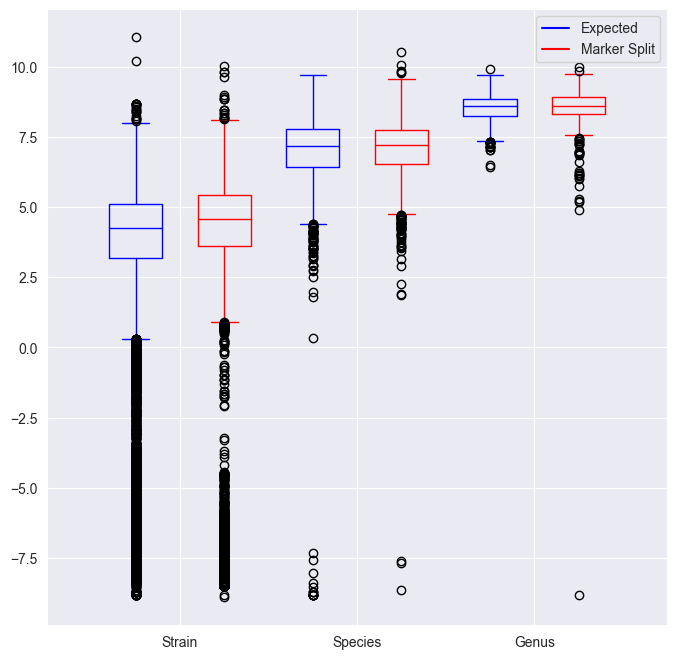

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))

strain_plt = ax.boxplot([strain_true, strain_test], positions=[1, 2], widths = 0.6)
setBoxColors(strain_plt)

species_plt = ax.boxplot([species_true, species_test], positions=[3, 4], widths = 0.6)
setBoxColors(species_plt)

genus_plt = ax.boxplot([genus_true, genus_test], positions=[5, 6], widths = 0.6)
setBoxColors(genus_plt)
# ax.set_yscale('log')

hB, = ax.plot([2,2],'b-')
hR, = ax.plot([2,2],'r-')
plt.legend((hB, hR),('Expected', 'Marker Split'))
hB.set_visible(False)
hR.set_visible(False)

ax.set_xlim(0, 7)
ax.set_xticks([1.5, 3.5, 5.5])
ax.set_xticklabels(['Strain', 'Species', 'Genus'])

# ax.set_ylim(0, None)


(-10.0, 12.0)

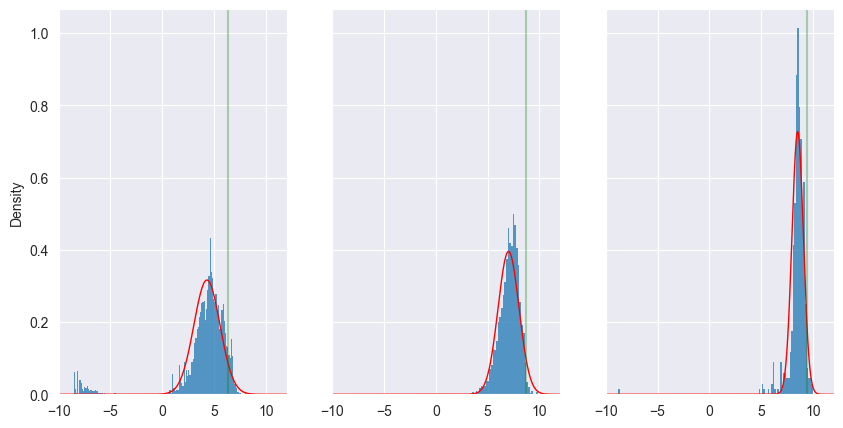

In [55]:
strain_loc = 4.311239323304133
strain_scale = 1.2613910883626223

species_loc = 7.023424767215613
species_scale = 1.009093016420437

genus_loc = 8.52715581033332
genus_scale = 0.5484917044777792

sig_strain = 1.65 * norm.std(strain_loc, strain_scale) + norm.mean(strain_loc, strain_scale)
sig_species = 1.65 * norm.std(species_loc, species_scale) + norm.mean(species_loc, species_scale)
sig_genus = 1.65 * norm.std(genus_loc, genus_scale) + norm.mean(genus_loc, genus_scale)


fig, (ax_strain, ax_species, ax_genus) = plt.subplots(1, 3, figsize=(10, 5), sharey=True, sharex=True)

x = np.linspace(-100, 200, 10000)

ax_strain.plot(x, norm.pdf(x, strain_loc, strain_scale), 'r-', lw=1, alpha=1)
# sns.histplot(strain_true, ax=ax_strain, stat='density')
sns.histplot(strain_test, ax=ax_strain, stat='density')
ax_strain.axvline(x=sig_strain, color='g', alpha=0.3)

ax_species.plot(x, norm.pdf(x, species_loc, species_scale), 'r-', lw=1, alpha=1)
# sns.histplot(species_true, ax=ax_species, stat='density')
sns.histplot(species_test, ax=ax_species, stat='density')
ax_species.axvline(x=sig_species, color='g', alpha=0.3)

ax_genus.plot(x, norm.pdf(x, genus_loc, genus_scale), 'r-', lw=1, alpha=1)
# sns.histplot(genus_true, ax=ax_genus, stat='density')
sns.histplot(genus_test, ax=ax_genus, stat='density')
ax_genus.axvline(x=sig_genus, color='g', alpha=0.3)

ax_strain.set_xlim(-10, 12)
# ax_strain.set_ylim(0, 1.1)